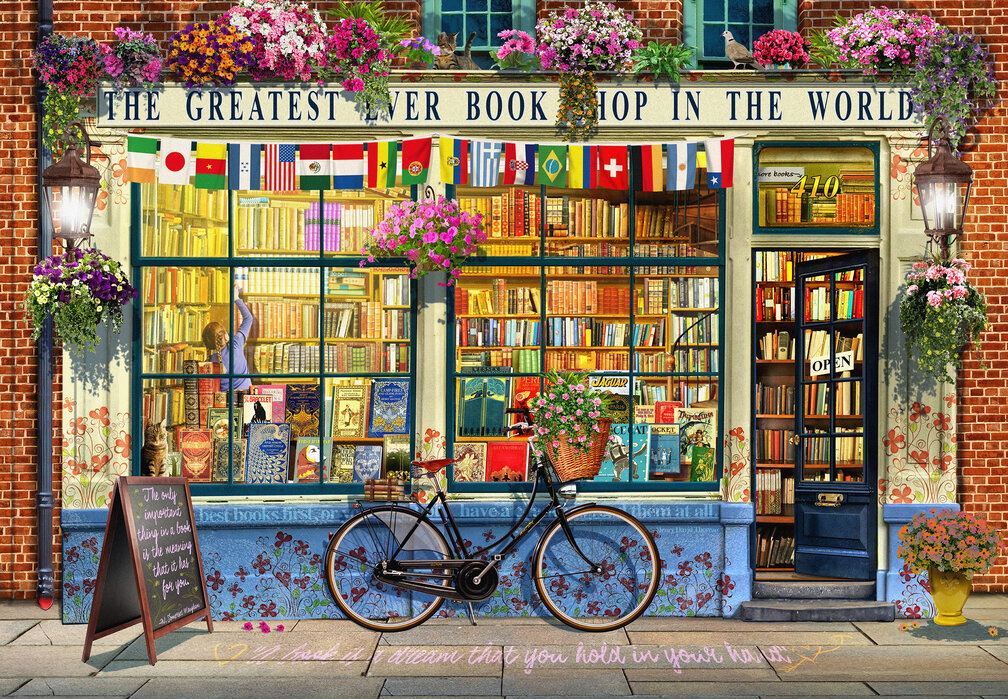


<p style="text-align:center;"><span style="font-size:48px;"><span style="color:crimson;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">Hello everyone. I plan to create a book recommendation system for better book selection in several kernels. In the first part, I am going to create a simple analysis and a search engine in the dataset. With this search engine, you can get good and accurate information before building a recommender system. So let's go..✔

</p>
</div>


# 1: First step: Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 2: Next: Import Dataset.

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 I used a certain dataset in this project. In addition, you can get the online dataset from the goodbook website by scraping.

</p>
</div>

In [3]:
Data = pd.read_csv("/kaggle/input/book-recommendation-good-book-api/books.csv", on_bad_lines='skip')
Data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [4]:
df = pd.DataFrame(Data)

# 3: Next: Functional describe dataset.

In [5]:
def describe(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [6]:
print(describe(df))

              variable    dtype  count  unique  missing value
0               bookID    int64  11123   11123              0
1                title   object  11123   10348              0
2              authors   object  11123    6639              0
3       average_rating  float64  11123     209              0
4                 isbn   object  11123   11123              0
5               isbn13    int64  11123   11123              0
6        language_code   object  11123      27              0
7            num_pages    int64  11123     997              0
8        ratings_count    int64  11123    5294              0
9   text_reviews_count    int64  11123    1822              0
10    publication_date   object  11123    3679              0
11           publisher   object  11123    2290              0


<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 There are no missing values ​​in this dataset. Also, the number of unique values, dtype and count of each column can be seen.

</p>
</div>

In [7]:
print("There are :", len(df)-len(df.drop_duplicates()), "missing values in dataset")

There are : 0 missing values in dataset


# 4: Next: Let's analysis dataset.

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.1: Start with (title)

</p>
</div>

In [8]:
Unique_title = pd.unique(df[['title']].values.ravel())
print("Number of Unique values: ",df[['title']].nunique())
Value_Unique_title = df[['title']].value_counts()
Value_Unique_title.head(50)

Number of Unique values:  title    10348
dtype: int64


title                                             
The Iliad                                             9
The Brothers Karamazov                                9
Anna Karenina                                         8
'Salem's Lot                                          8
Gulliver's Travels                                    8
The Odyssey                                           8
The Picture of Dorian Gray                            7
A Midsummer Night's Dream                             7
The Great Gatsby                                      6
Sense and Sensibility                                 6
The Secret Garden                                     6
The Scarlet Letter                                    6
Treasure Island                                       6
Romeo and Juliet                                      6
Jane Eyre                                             6
Robinson Crusoe                                       6
Macbeth                                              

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Some books in the database exist more than once. This is not due to the repetition of the rows of the dataset and is due to the difference in the publications, the year of publication, and the written language of the book. For example, let's examine the first book that has the most repetition.

</p>
</div>

In [9]:
df.loc[df['title']== "The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 In the cell below, you can see the 20 most repeated books of this dataset.

</p>
</div>

Text(0.5, 1.0, 'Top 20 Books - Count')

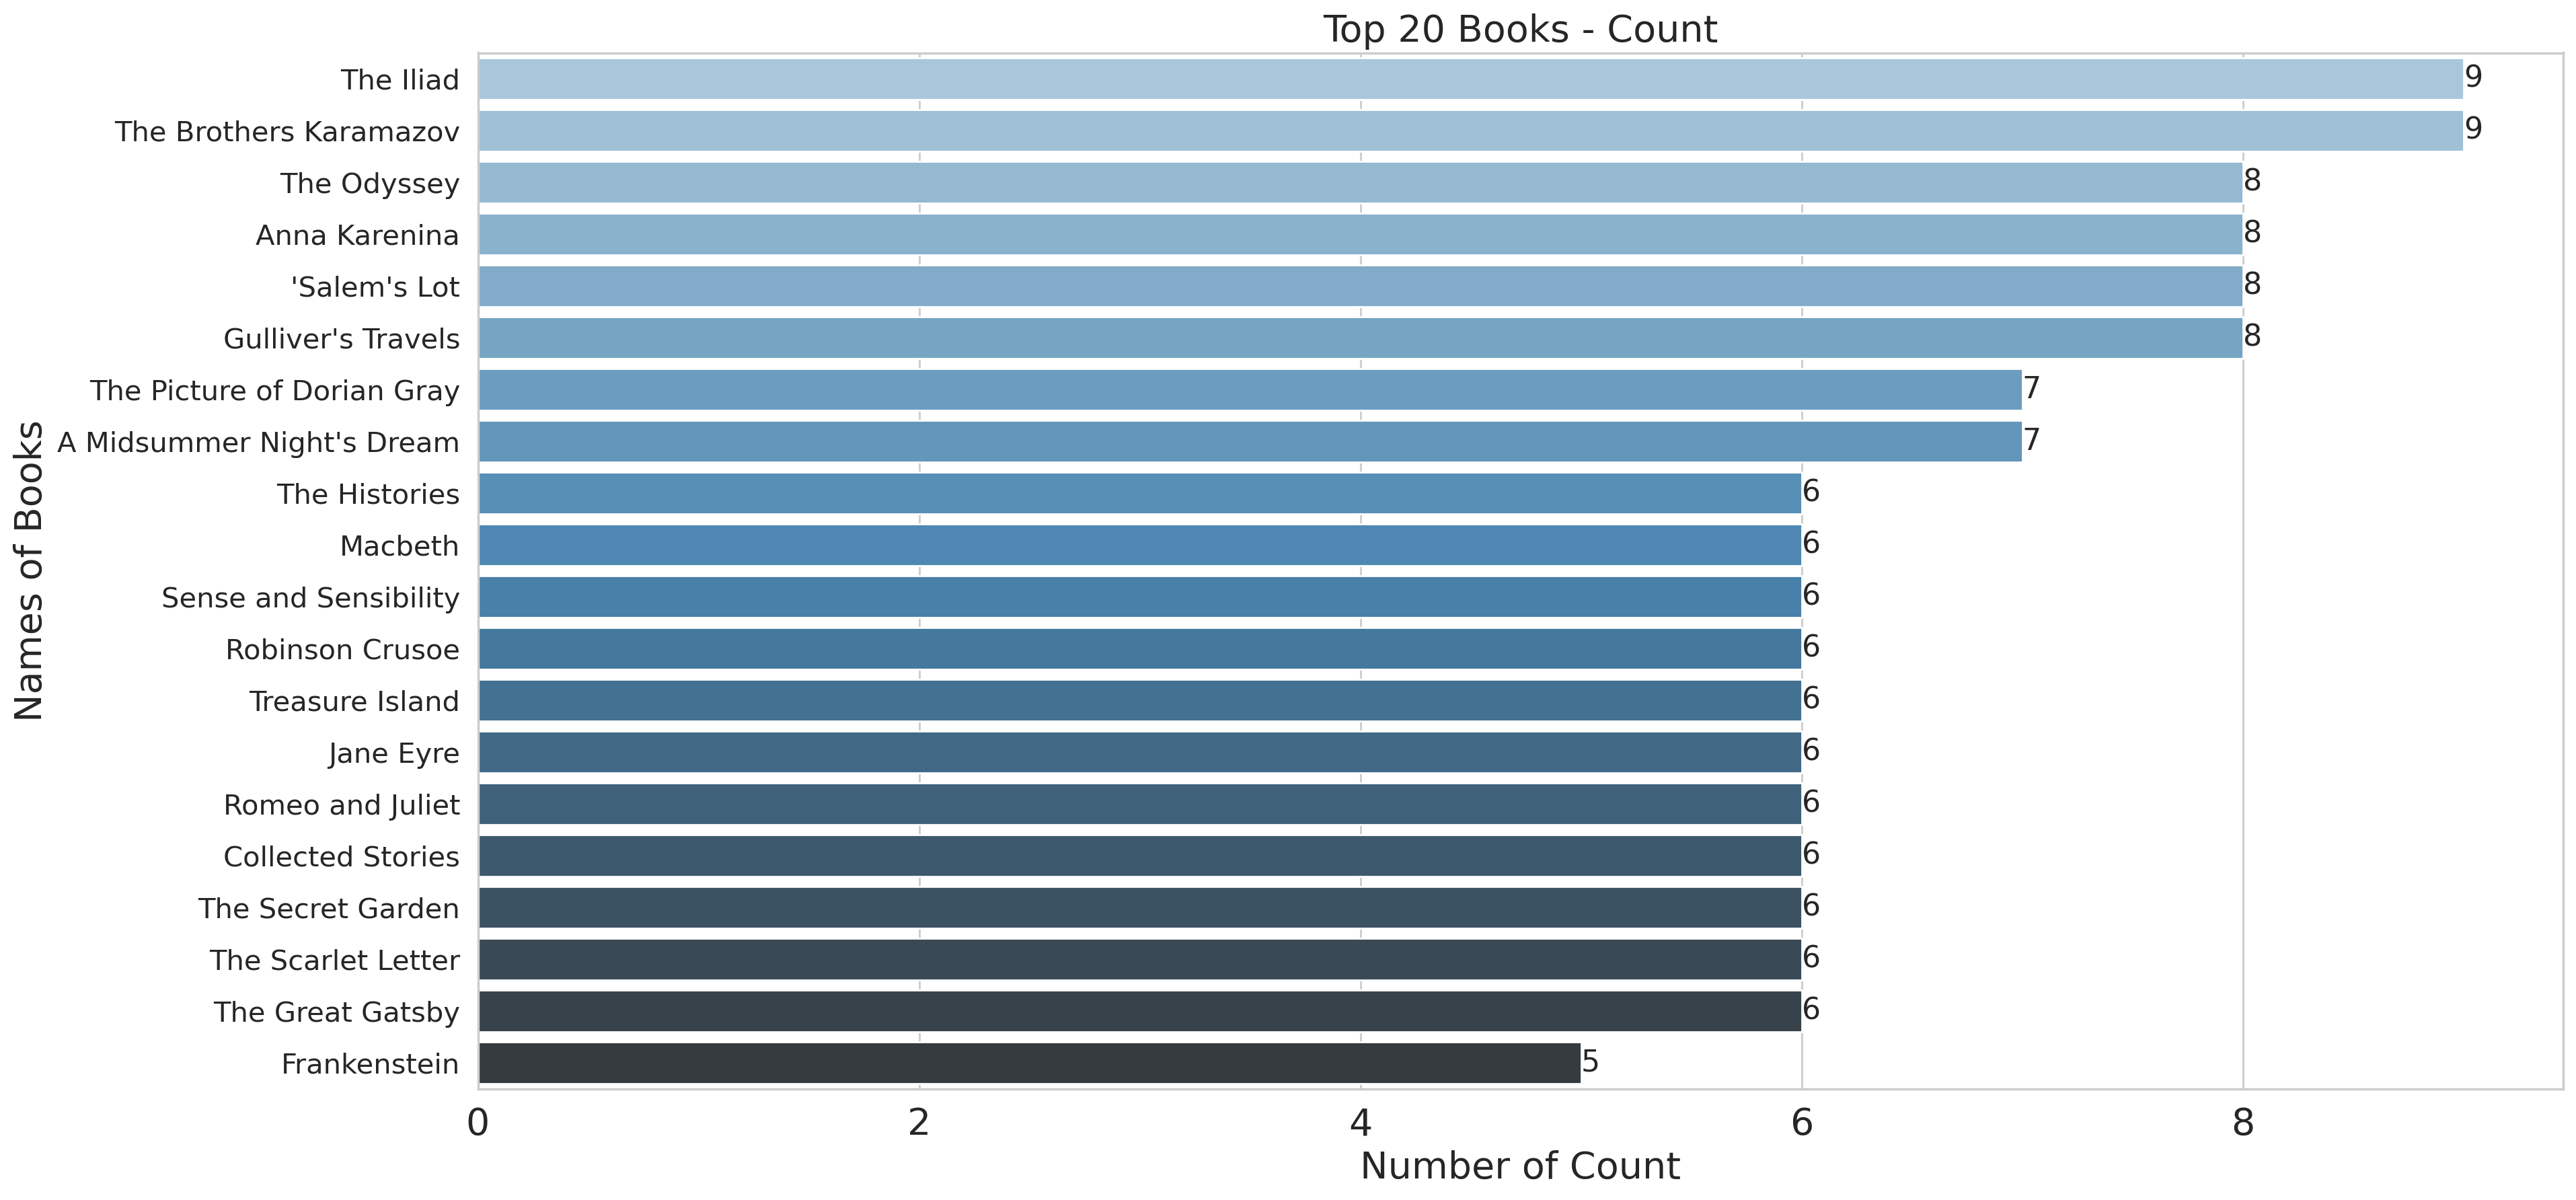

In [10]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books = df['title'].value_counts()[:20]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="Blues_d")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Books - Count", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.2: Next with (authors)

</p>
</div>

In [11]:
Unique_authors = pd.unique(df[['authors']].values.ravel())
print("Number of Unique values: ",df[['authors']].nunique())
Value_Unique_authors = df[['authors']].value_counts()
Value_Unique_authors.head(50)

Number of Unique values:  authors    6639
dtype: int64


authors                           
Stephen King                          40
P.G. Wodehouse                        40
Rumiko Takahashi                      39
Orson Scott Card                      35
Agatha Christie                       33
Piers Anthony                         30
Mercedes Lackey                       29
Sandra Brown                          29
Dick Francis                          28
Laurell K. Hamilton                   23
Terry Pratchett                       23
Margaret Weis/Tracy Hickman           23
James Patterson                       23
Gordon Korman                         22
Dan Simmons                           21
Bill Bryson                           21
Alan Dean Foster                      21
Janet Evanovich                       21
Dean Koontz                           20
Gabriel García Márquez                20
Philip Roth                           18
Robert A. Heinlein                    18
Terry Brooks                          18
Jodi Picoult          

In [12]:
df.loc[df['authors']== "Stephen King"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1459,5094,The Drawing of the Three (The Dark Tower #2),Stephen King,4.23,0451210859,9780451210852,eng,463,173022,5139,8/5/2003,Signet
1574,5415,'Salem's Lot,Stephen King,4.02,0965772411,9780965772419,eng,405,1039,130,10/17/1975,Doubleday
1575,5417,Carrie / 'Salem's Lot / The Shining,Stephen King,4.54,0517219026,9780517219027,eng,1096,13137,61,7/2/2002,Wings
1576,5419,'Salem's Lot,Stephen King,4.02,0451092317,9780451092311,en-US,427,178,35,11/13/1979,Signet
1577,5420,'Salem's Lot,Stephen King,4.02,0340770538,9780340770535,eng,586,25,6,10/6/2010,Hodder & Stoughton Ltd
2843,10566,Lisey's Story,Stephen King,3.68,0743289412,9780743289412,eng,513,59097,2709,10/24/2006,Scribner
2847,10574,The Colorado Kid,Stephen King,3.32,0843955848,9780843955842,eng,178,24611,1970,2/20/2006,Hard Crime Case
2849,10579,Everything's Eventual: 14 Dark Tales,Stephen King,3.97,1416524355,9781416524359,eng,605,73145,1519,11/1/2005,Pocket Books
2851,10583,Pet Sematary,Stephen King,3.98,1416524347,9781416524342,eng,576,257466,3768,11/1/2005,Pocket Books
2859,10603,Cujo,Stephen King,3.71,0307348245,9780307348241,spa,432,197993,2816,6/6/2006,Plaza y Janés


Text(0.5, 1.0, 'Top 20 authors - Count')

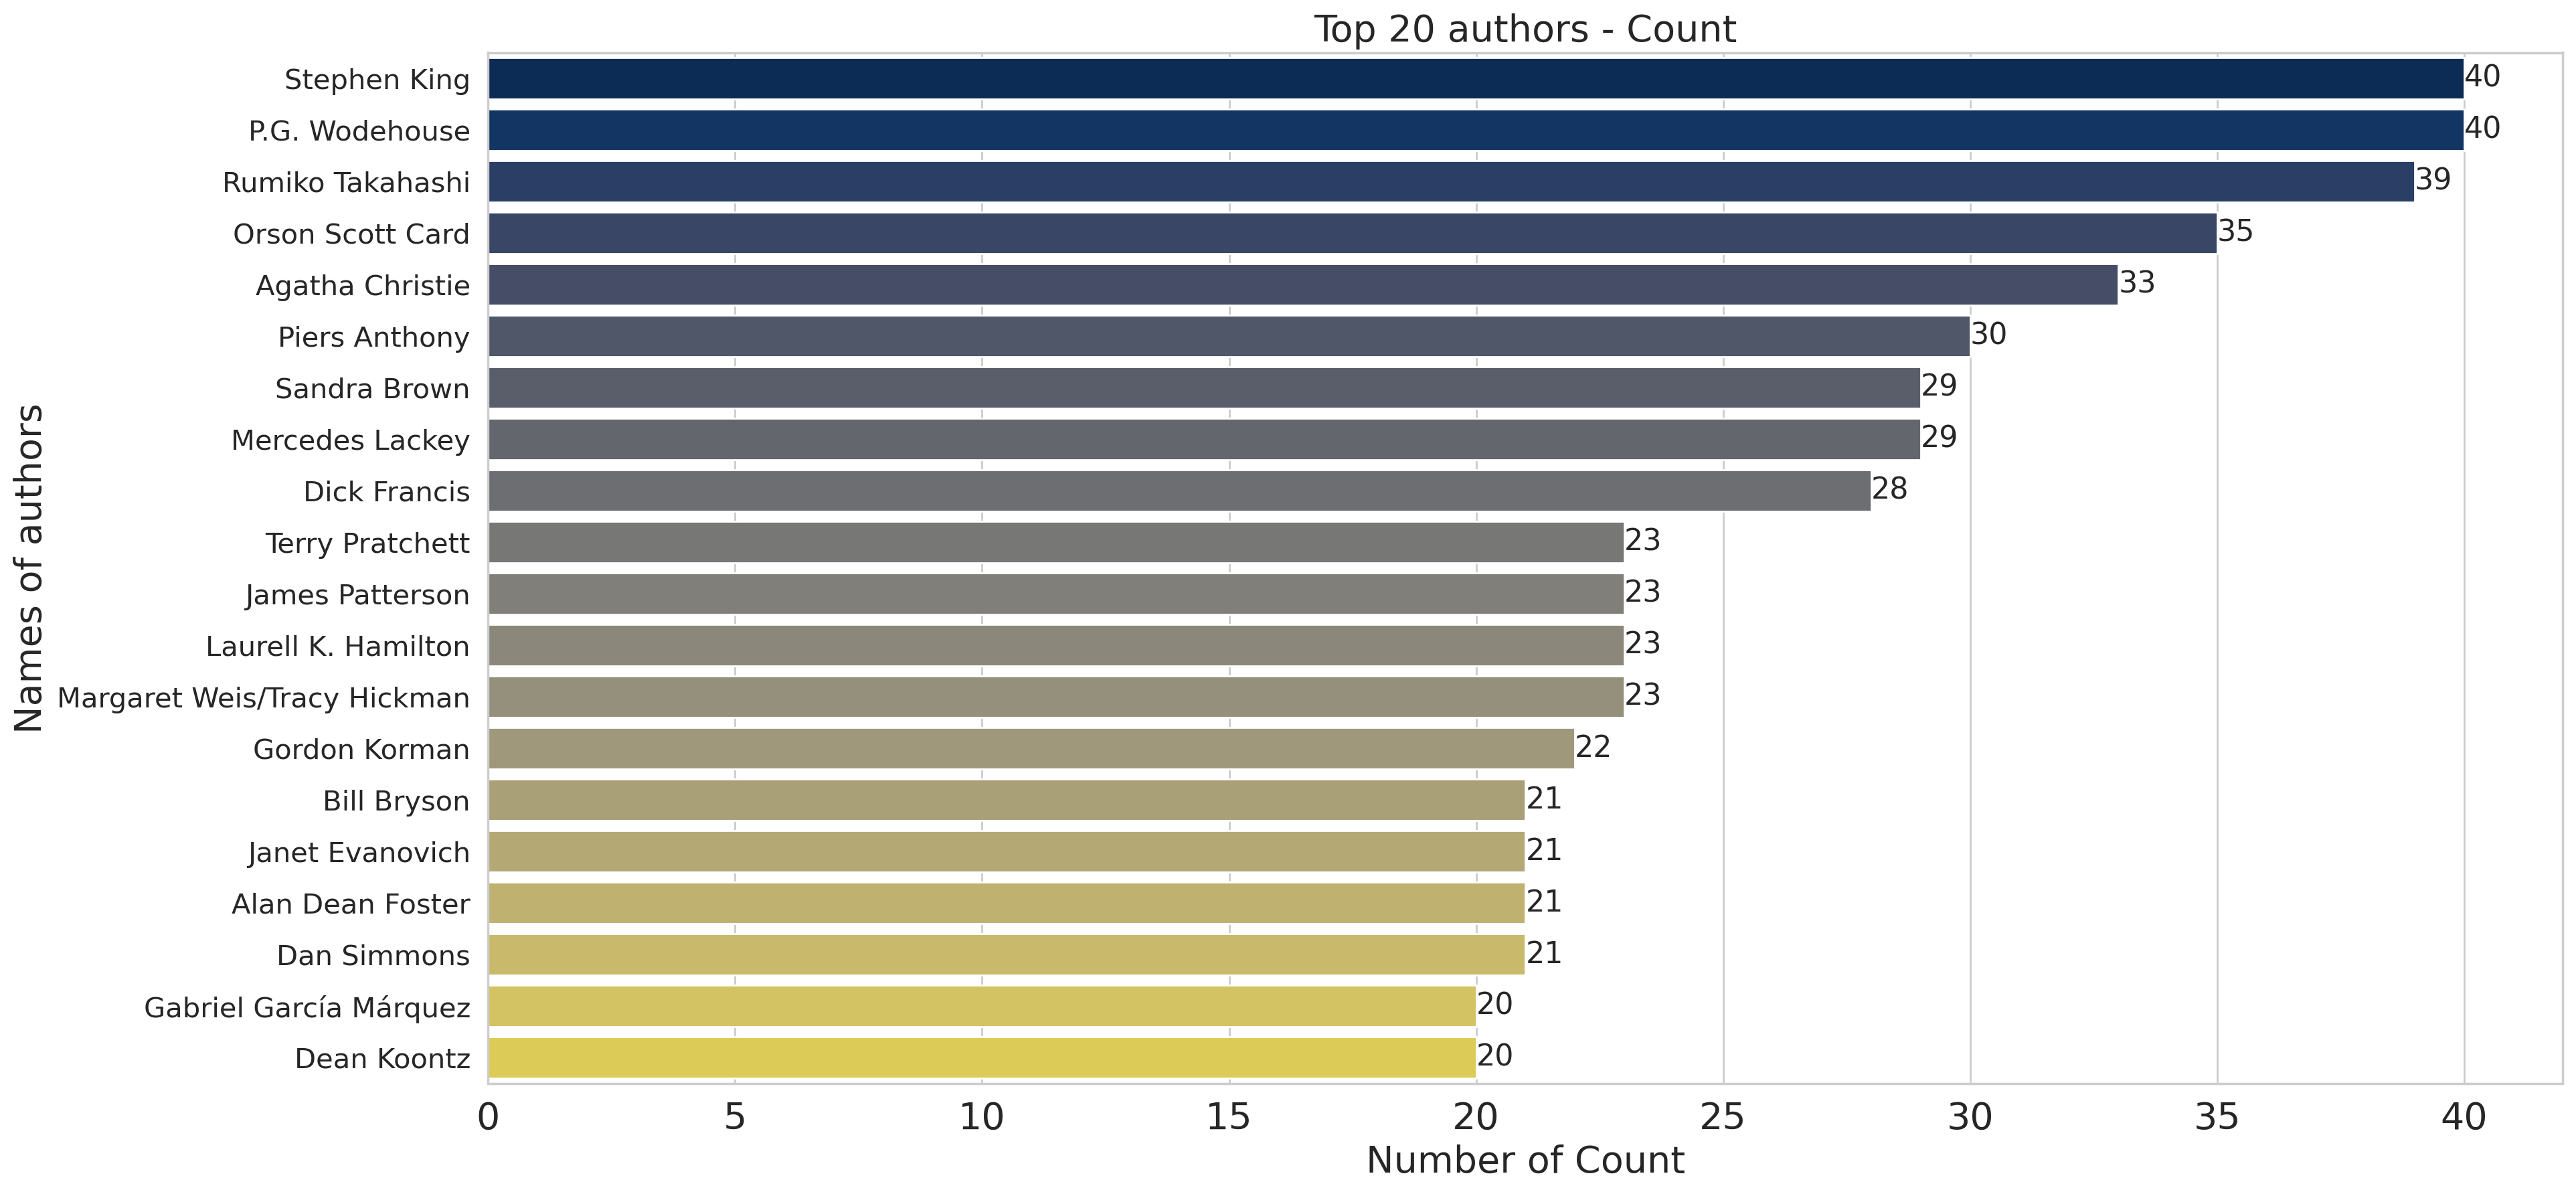

In [13]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_authors = df['authors'].value_counts()[:20]
ax = sns.barplot(x= Top_20_authors, y= Top_20_authors.index, palette="cividis")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of authors", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 authors - Count", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.3: Next with (publisher)

</p>
</div>

In [14]:
Unique_publish = pd.unique(df[['publisher']].values.ravel())
print("Number of Unique values: ",df[['publisher']].nunique())
Value_Unique_publish = df[['publisher']].value_counts()
Value_Unique_publish.head(50)

Number of Unique values:  publisher    2290
dtype: int64


publisher                   
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
HarperCollins                   112
Harper Perennial                112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Grand Central Publishing         76
Tor Books                        76
Oxford University Press  USA     75
Scribner                         73
Oxford University Press          73
W. W. Norton  Company            68
Cambridge University Press       66
Signet                           66
Simon  Schuster                  65
Anchor                           62
William Morrow Paperbacks        58
Penguin                          58
Avon                             56

Text(0.5, 1.0, 'Top 20 publishers - Count')

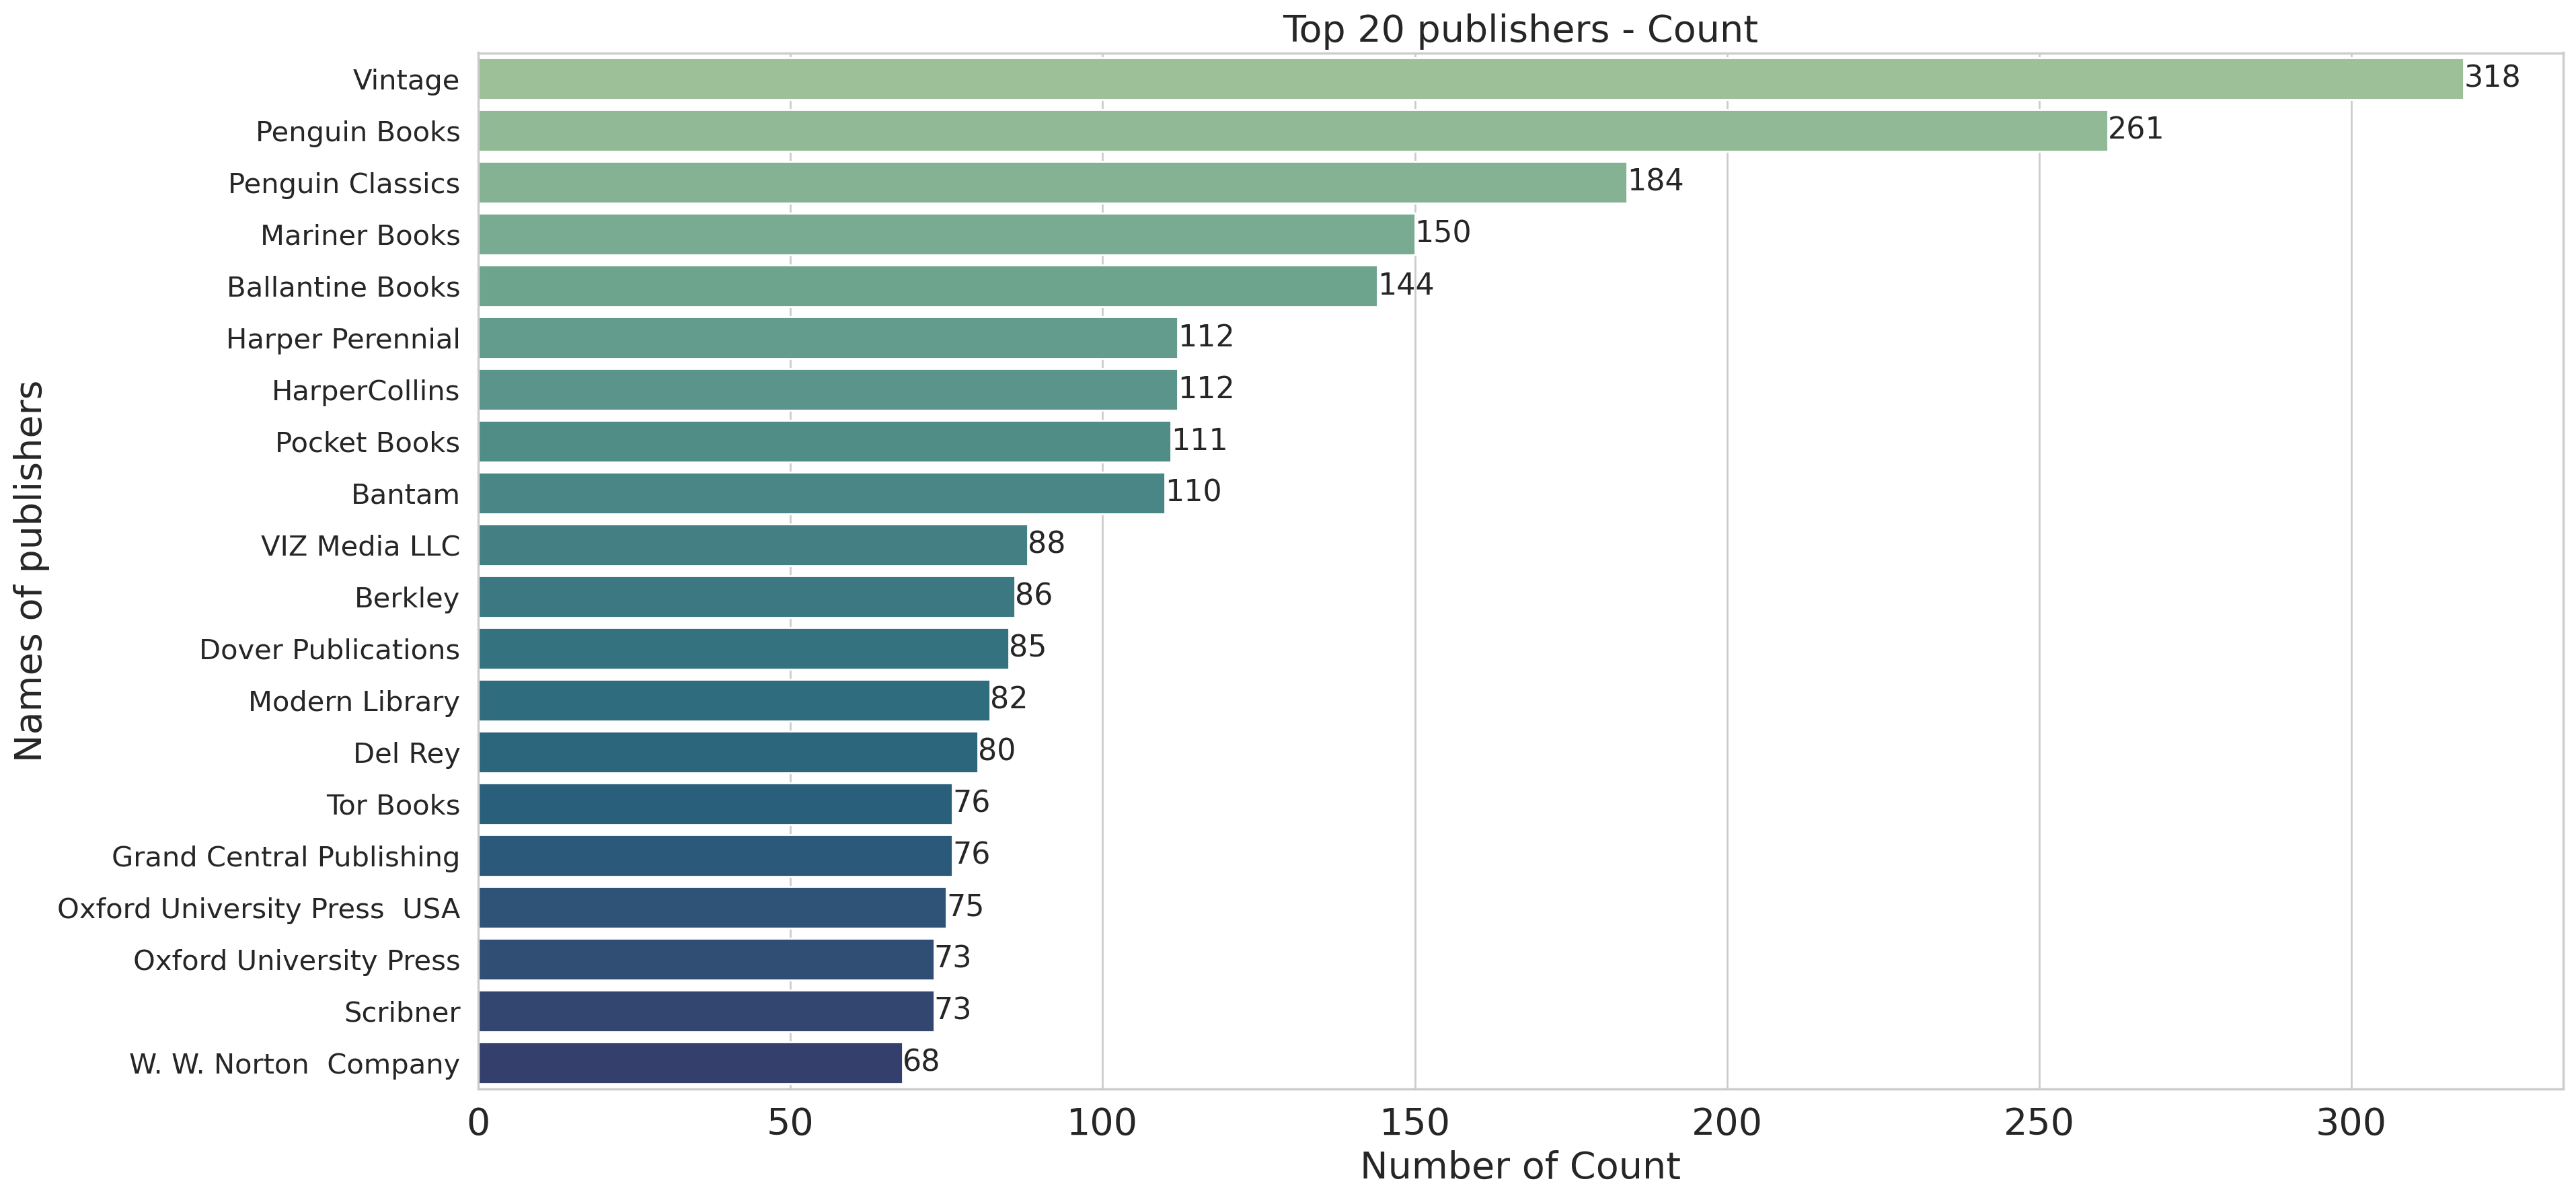

In [15]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publish = df['publisher'].value_counts()[:20]
ax = sns.barplot(x= Top_20_publish, y= Top_20_publish.index, palette="crest")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of publishers", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 publishers - Count", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.4: Next with (average_rating), look at the distribution

</p>
</div>

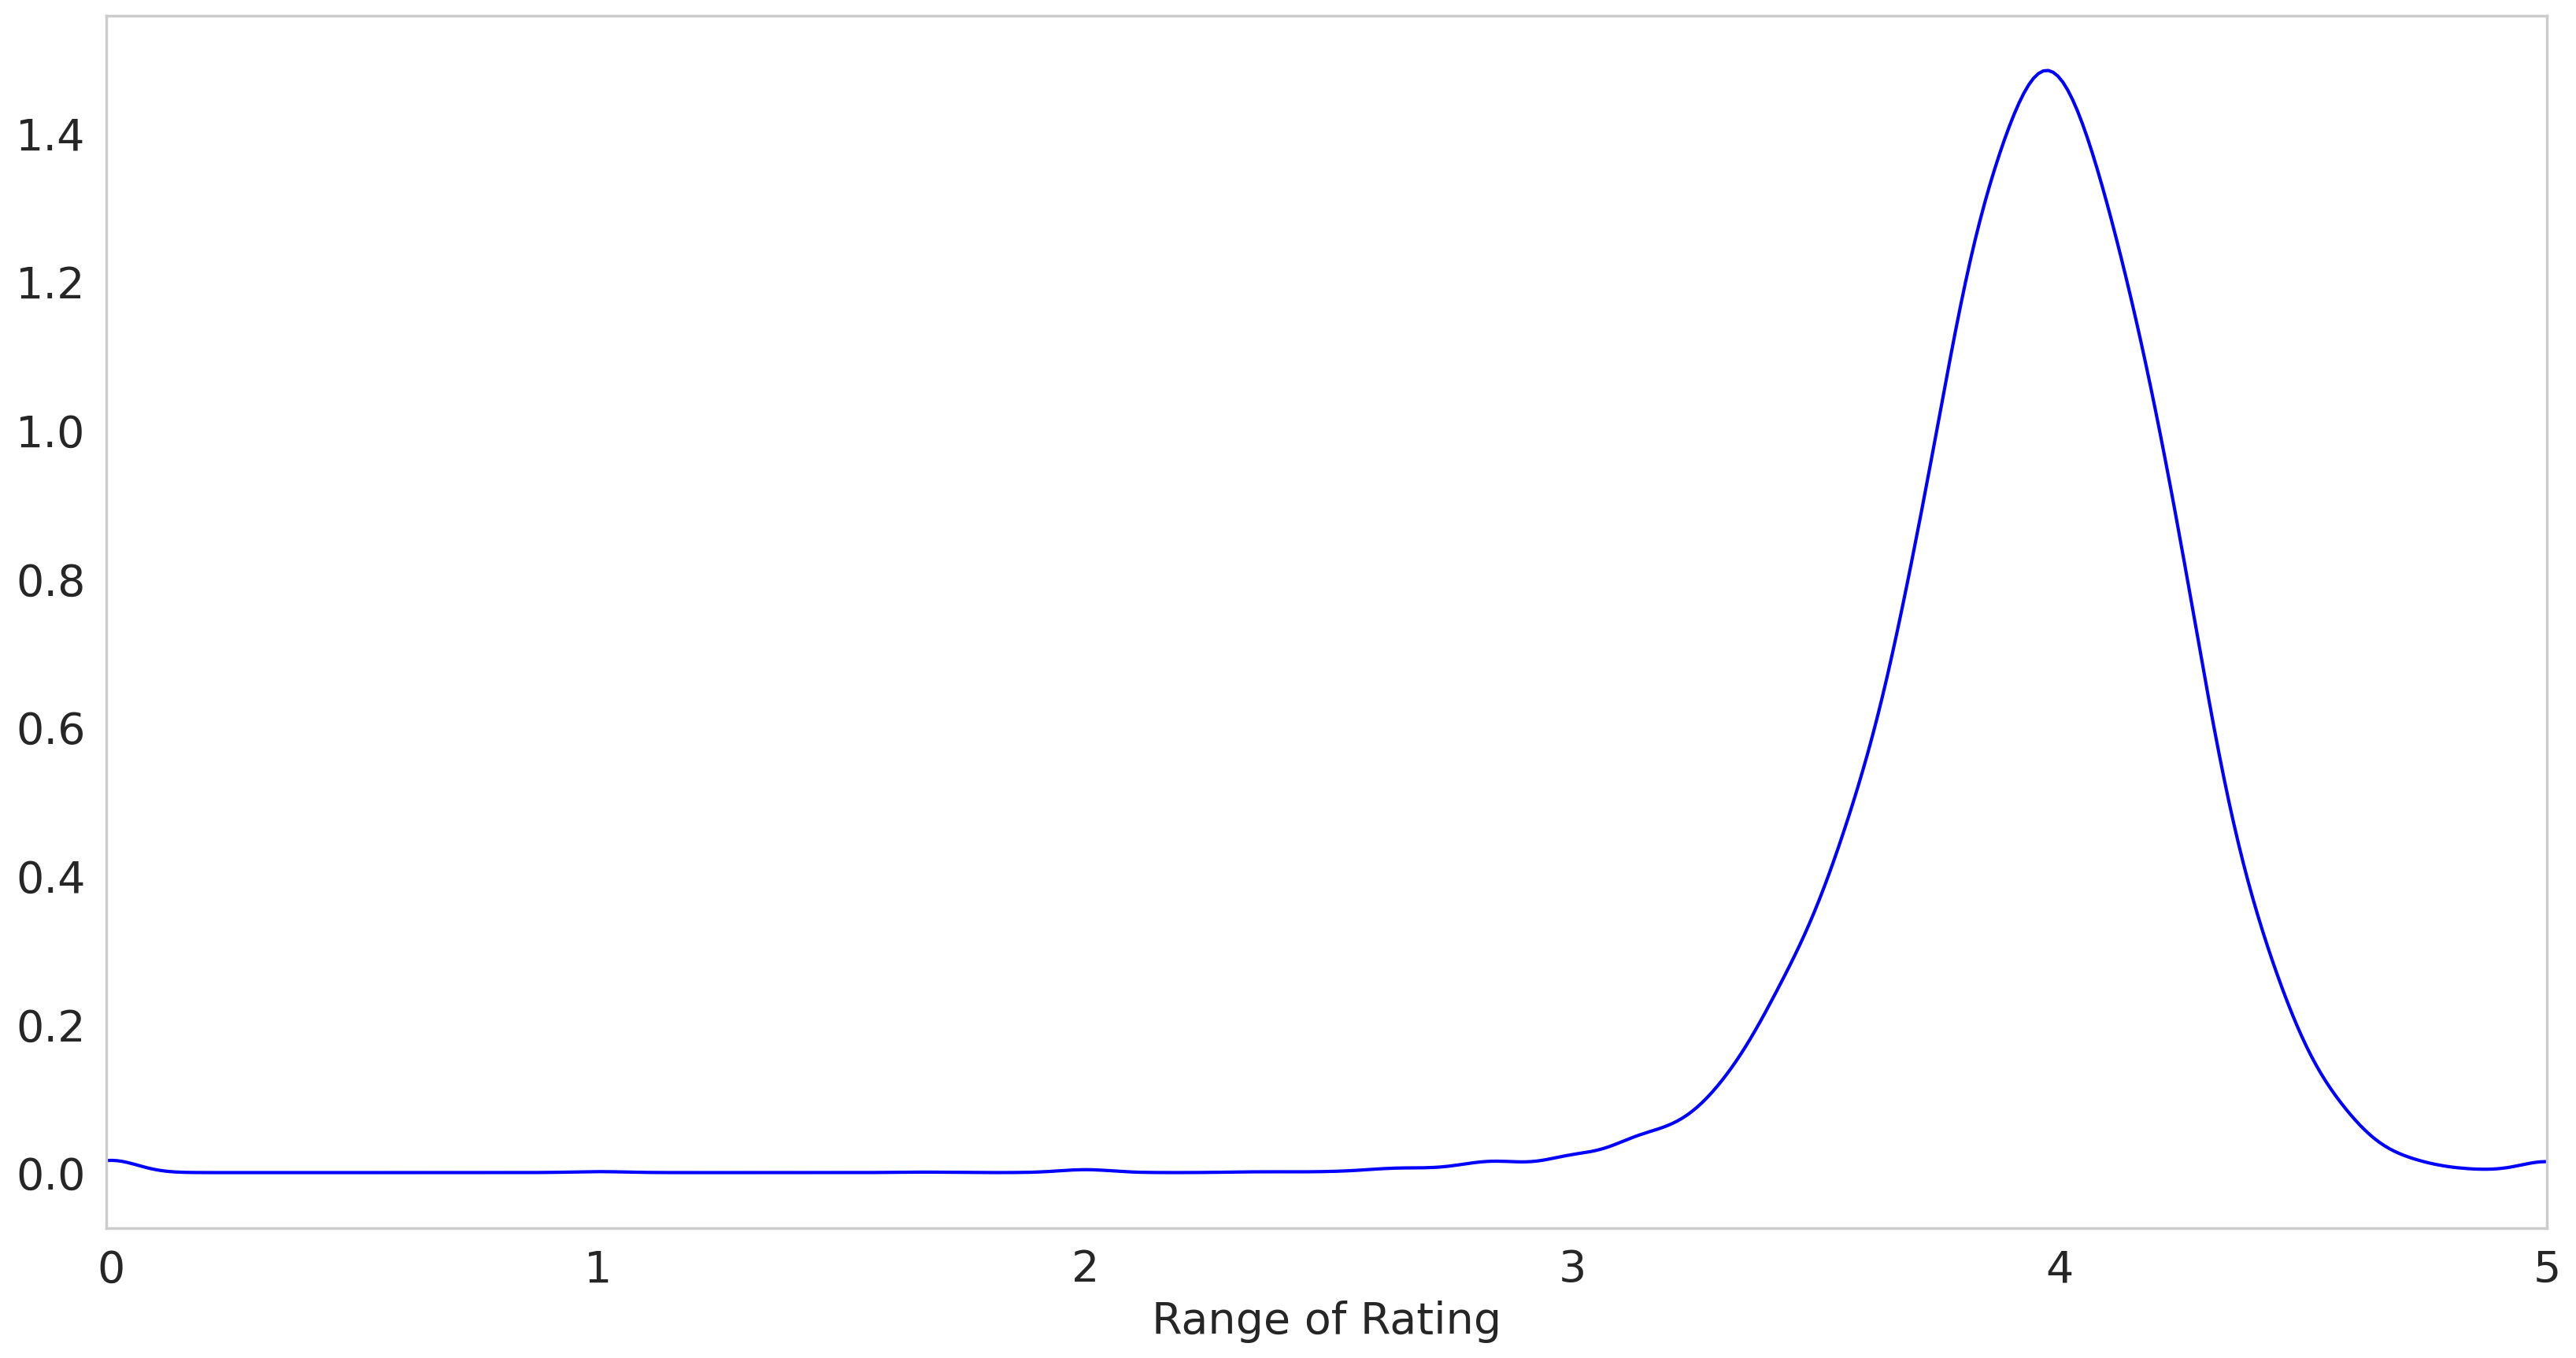

In [16]:
plt.figure(figsize=(20,10),dpi=200)
ax = df['average_rating'].plot(kind='kde',color='blue')
plt.xlabel("Range of Rating", fontsize=20)
plt.ylabel("")
plt.xlim([-.01, 5])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.grid()

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Most of the ratings are between 3 and 5, and a few ratings are between 0 and 3.
</p>
</div>

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.5: Next with (num_pages), look at the distribution

</p>
</div>

In [17]:
print(df["  num_pages"].min())
print(df["  num_pages"].max())

0
6576


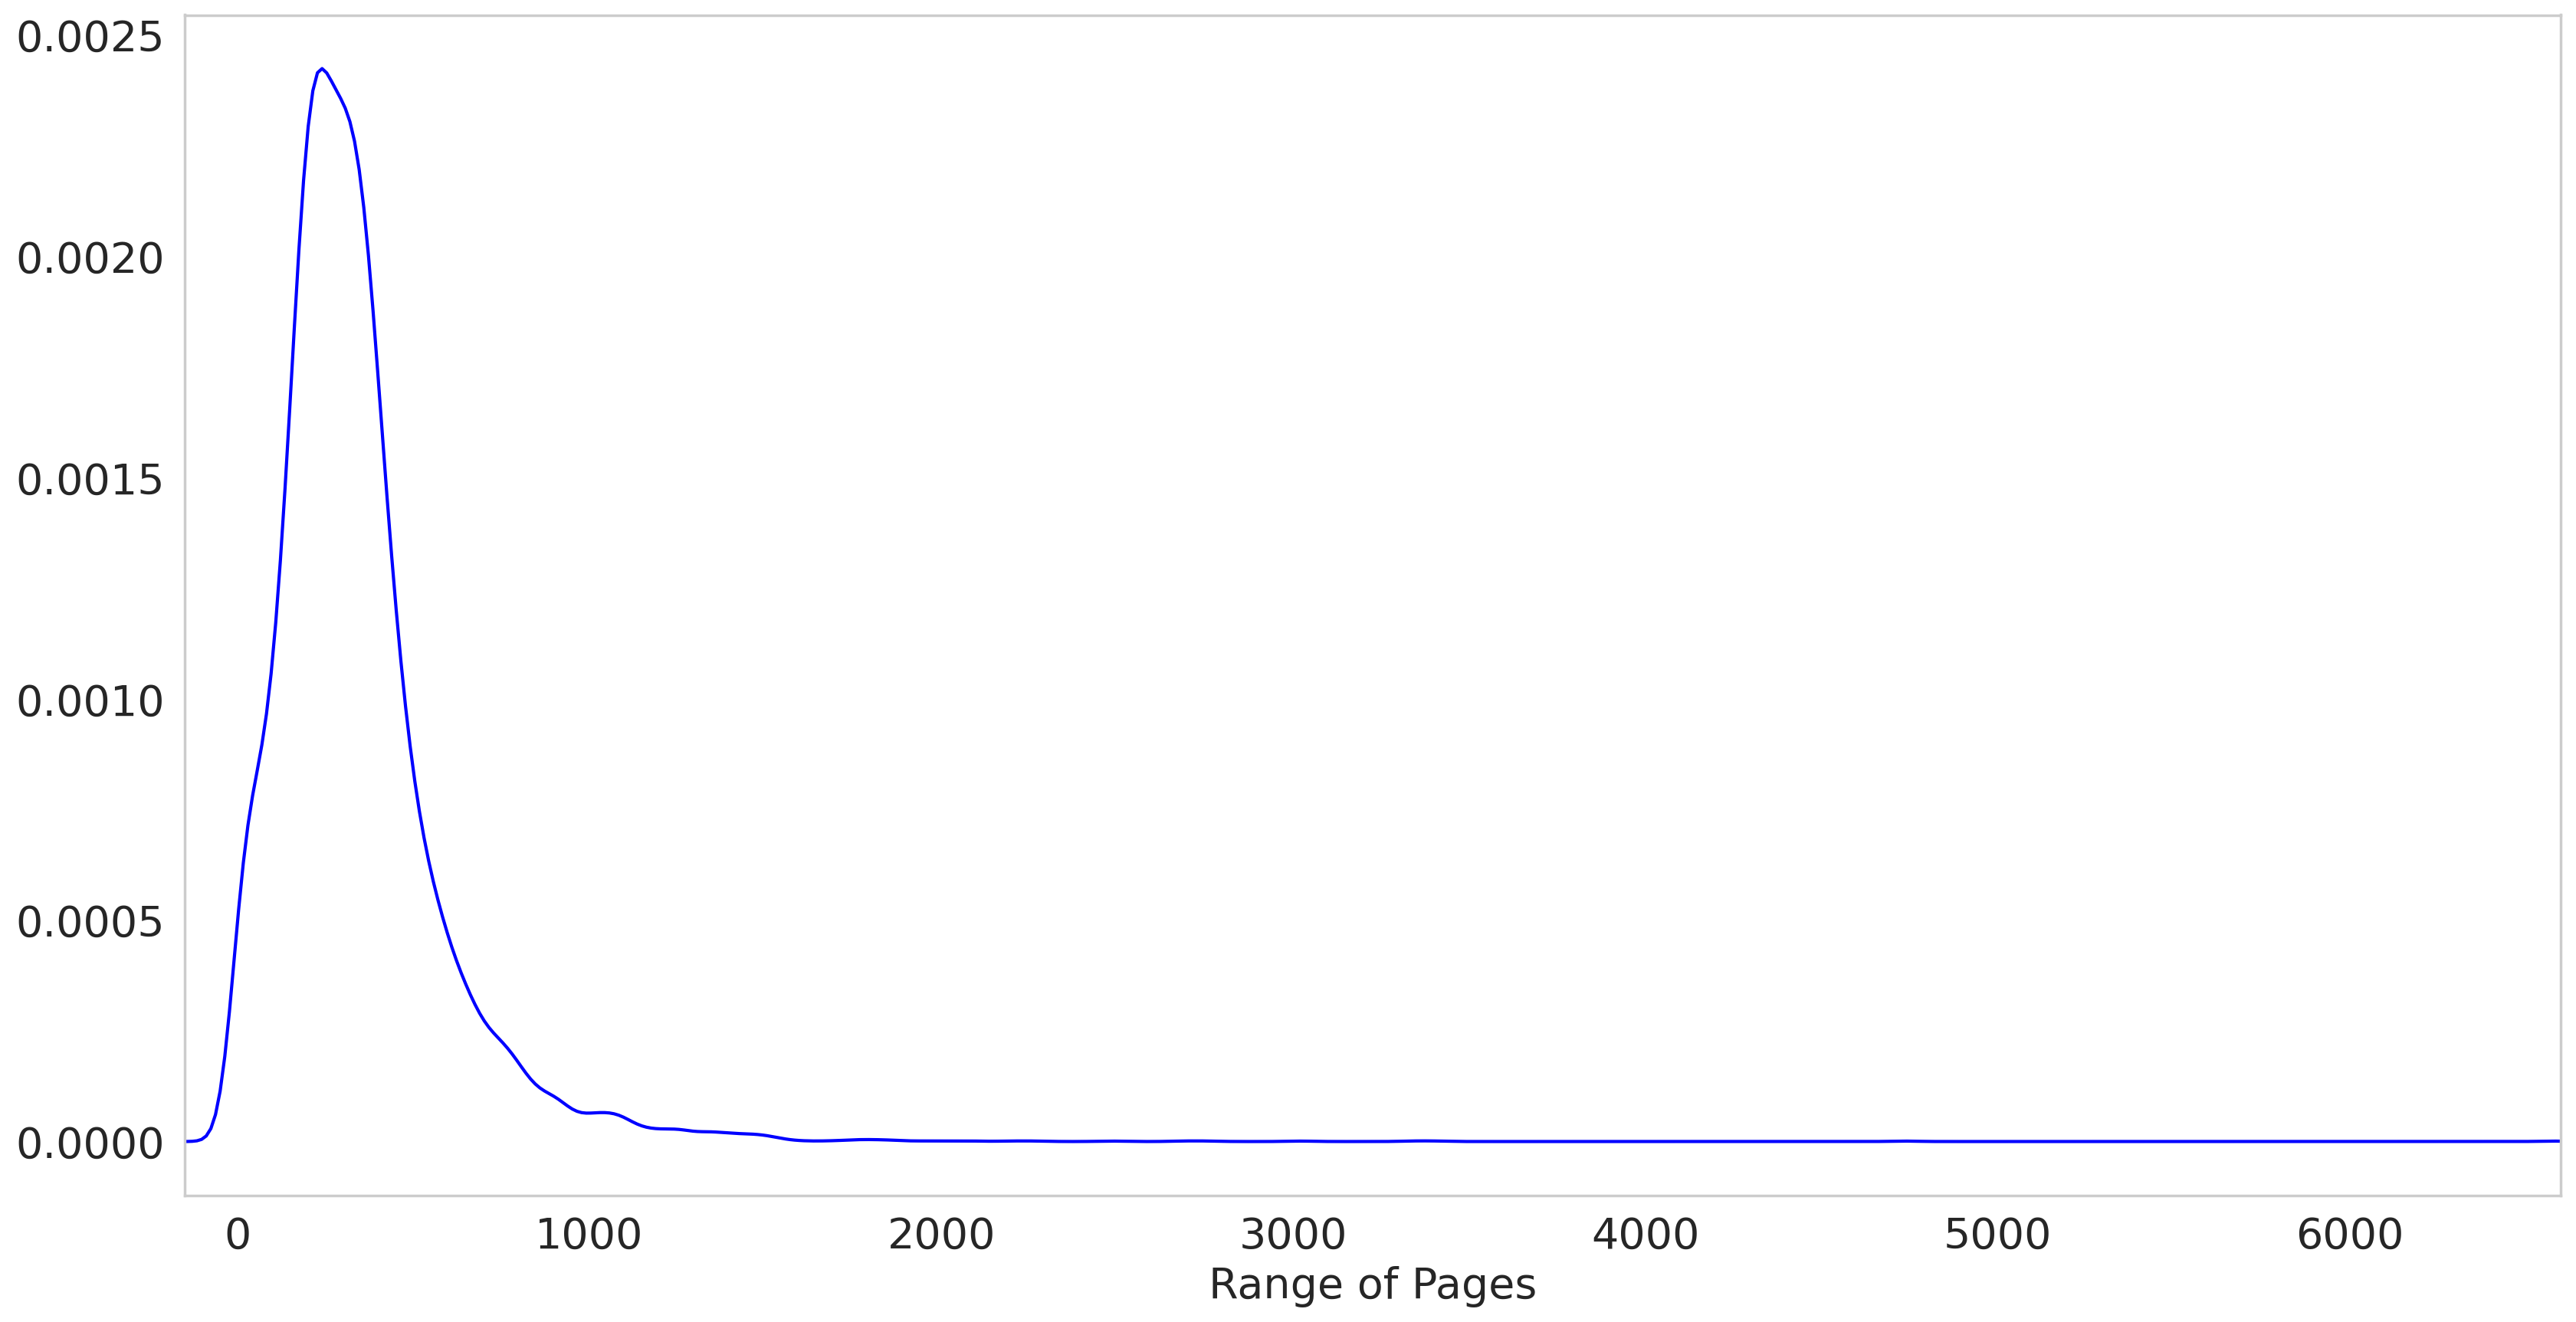

In [18]:
plt.figure(figsize=(20,10),dpi=200)
ax = df["  num_pages"].plot(kind='kde',color='blue')
plt.xlabel("Range of Pages", fontsize=20)
plt.ylabel("")
plt.xlim([-150, 6600])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.grid()

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 There is a 6576-page book in the dataset. Not considering these books, almost most of the books have less than 1000 pages and they seem reasonable.

</p>
</div>

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.6: Next with (language_code)

</p>
</div>

In [19]:
Unique_Lan_Code = pd.unique(df[['language_code']].values.ravel())
print("Number of Unique values: ",df[['language_code']].nunique())
Value_Unique_Lan_Code = df[['language_code']].value_counts()
Value_Unique_Lan_Code.head(50)

Number of Unique values:  language_code    27
dtype: int64


language_code
eng              8908
en-US            1408
spa               218
en-GB             214
fre               144
ger                99
jpn                46
mul                19
zho                14
grc                11
por                10
en-CA               7
ita                 5
lat                 3
enm                 3
swe                 2
rus                 2
gla                 1
wel                 1
tur                 1
srp                 1
nor                 1
glg                 1
nl                  1
msa                 1
ara                 1
ale                 1
dtype: int64

Text(0.5, 1.0, 'Top 20 Language Code - Count')

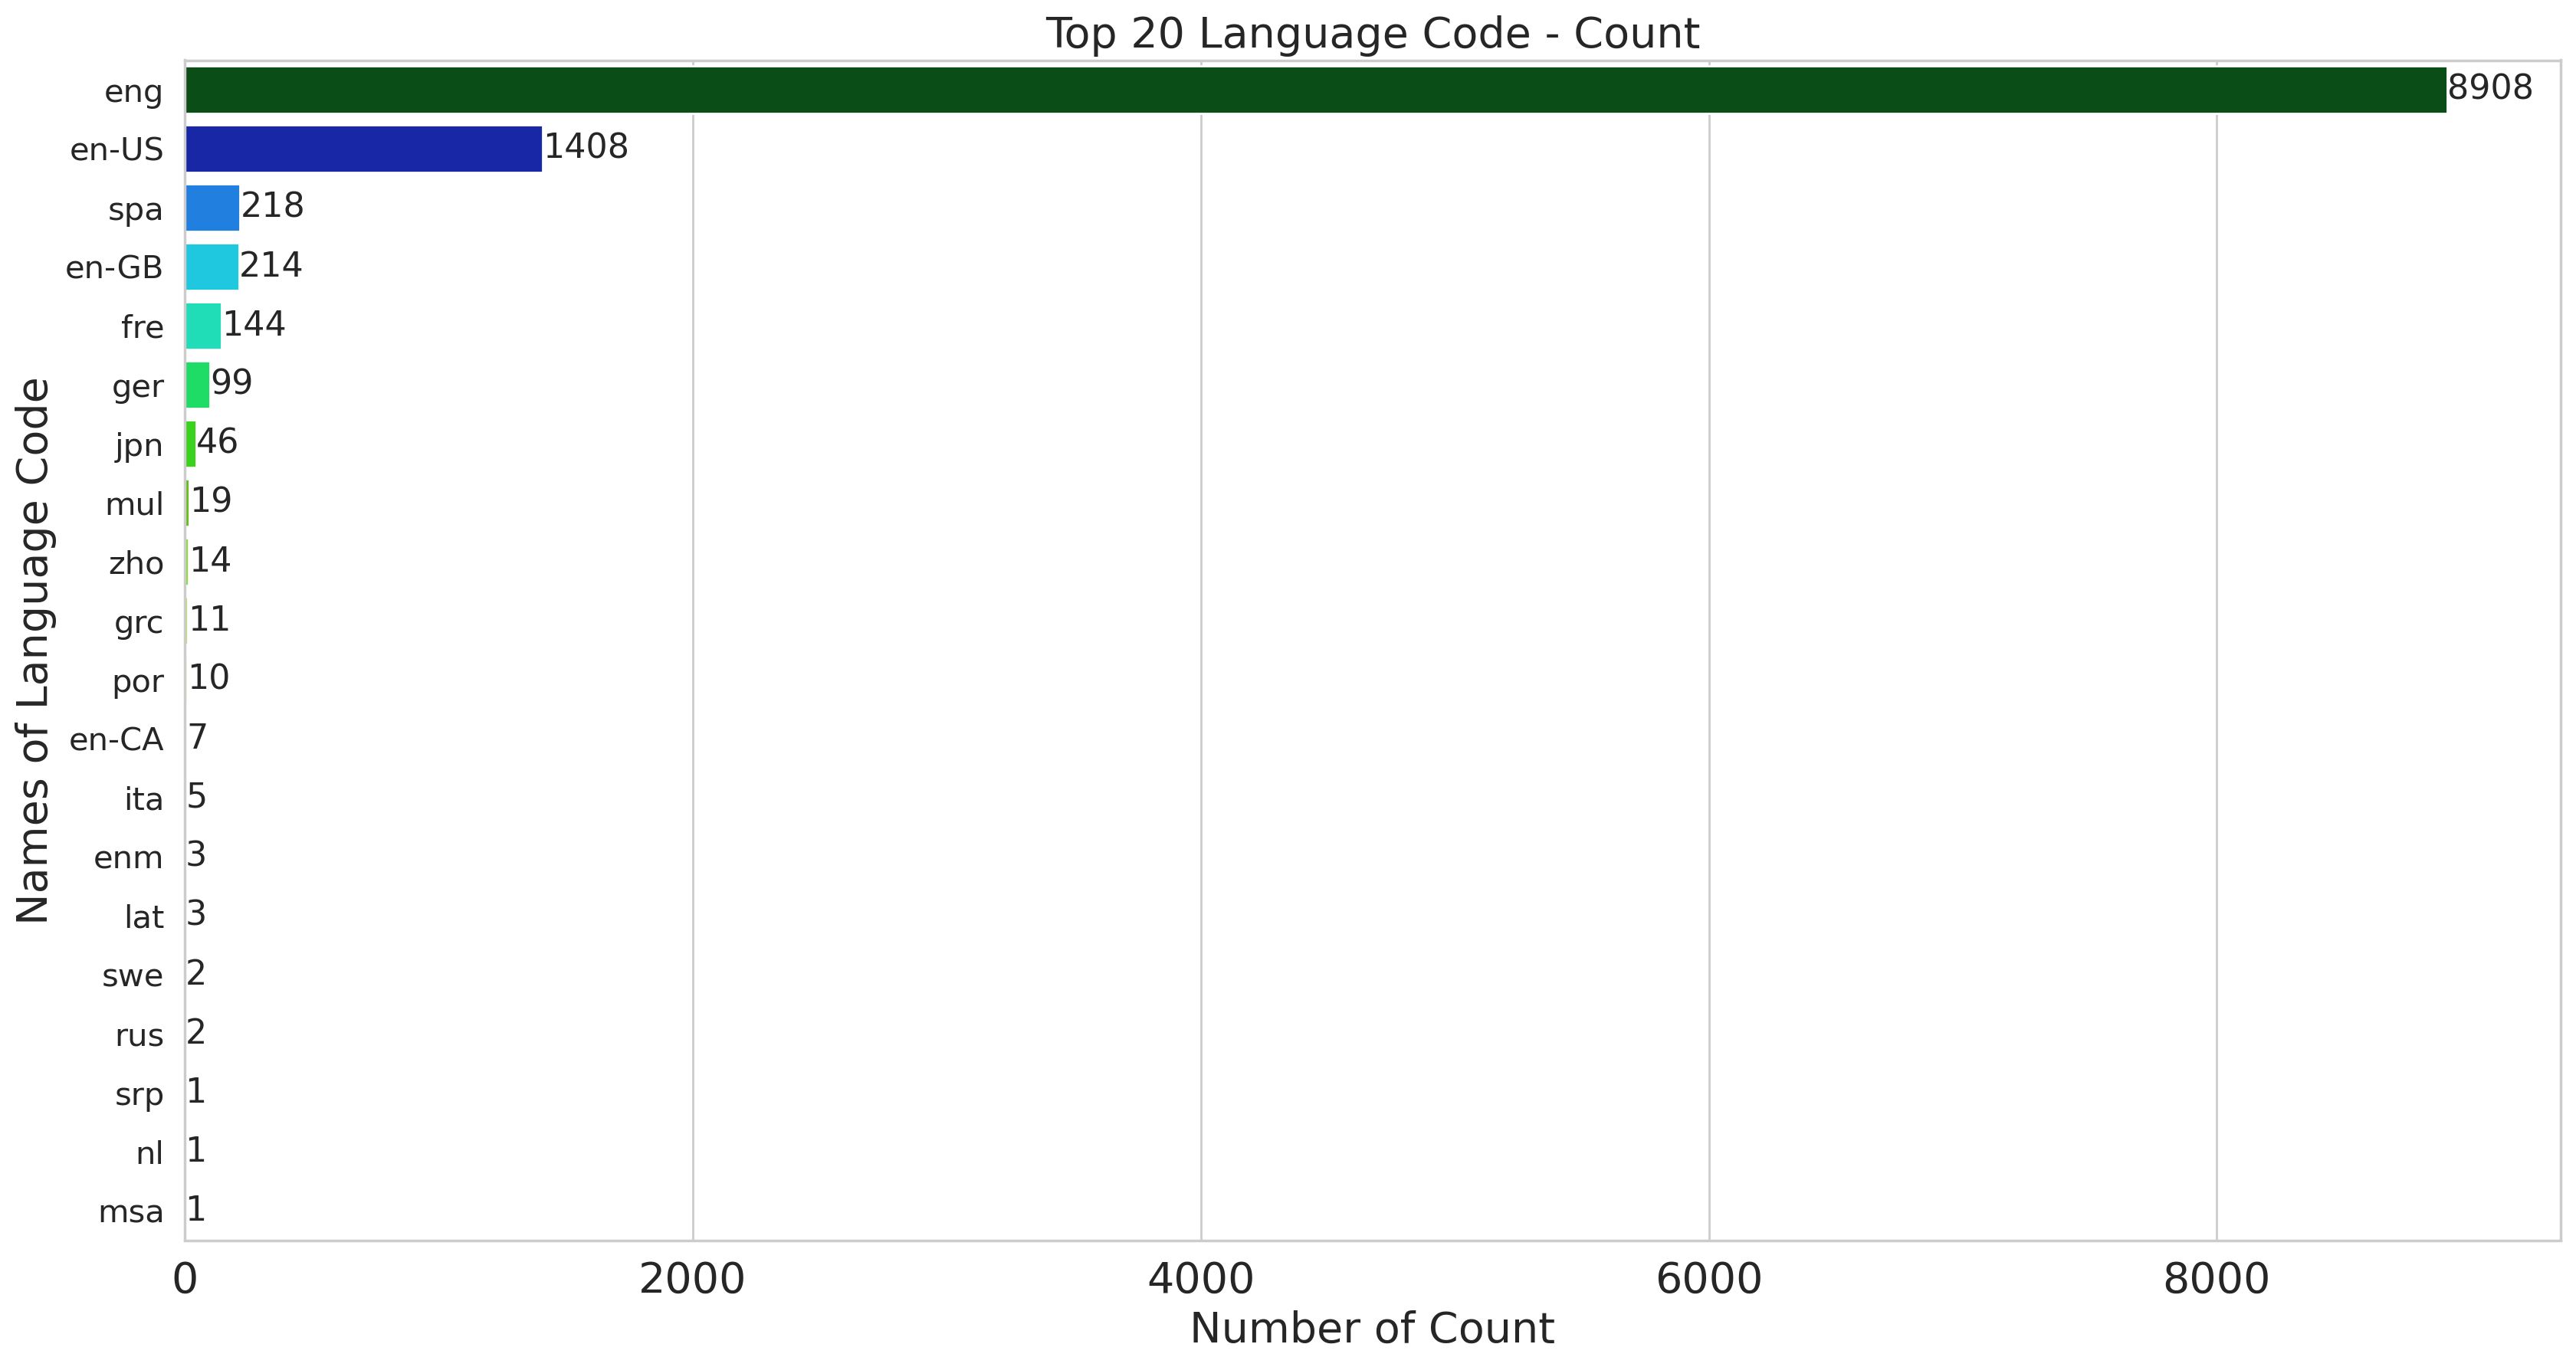

In [20]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_Lan_Code = df['language_code'].value_counts()[:20]
ax = sns.barplot(x= Top_20_Lan_Code, y= Top_20_Lan_Code.index, palette="gist_ncar")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Language Code", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Language Code - Count", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 4.7: Next, considering (rate) of books

</p>
</div>

In [21]:
df1 = df.sort_values(by=["average_rating"], ascending=[False])

In [22]:
df1.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
9893,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9781590529621,eng,240,2,0,10/16/2007,Multnomah
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
9324,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2/1/2003,Disney Press
9720,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9781930901353,eng,222,1,0,7/25/2003,Academica Press


<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Top 20 Books

</p>
</div>

Text(0.5, 1.0, 'Top 20 Books - Rate')

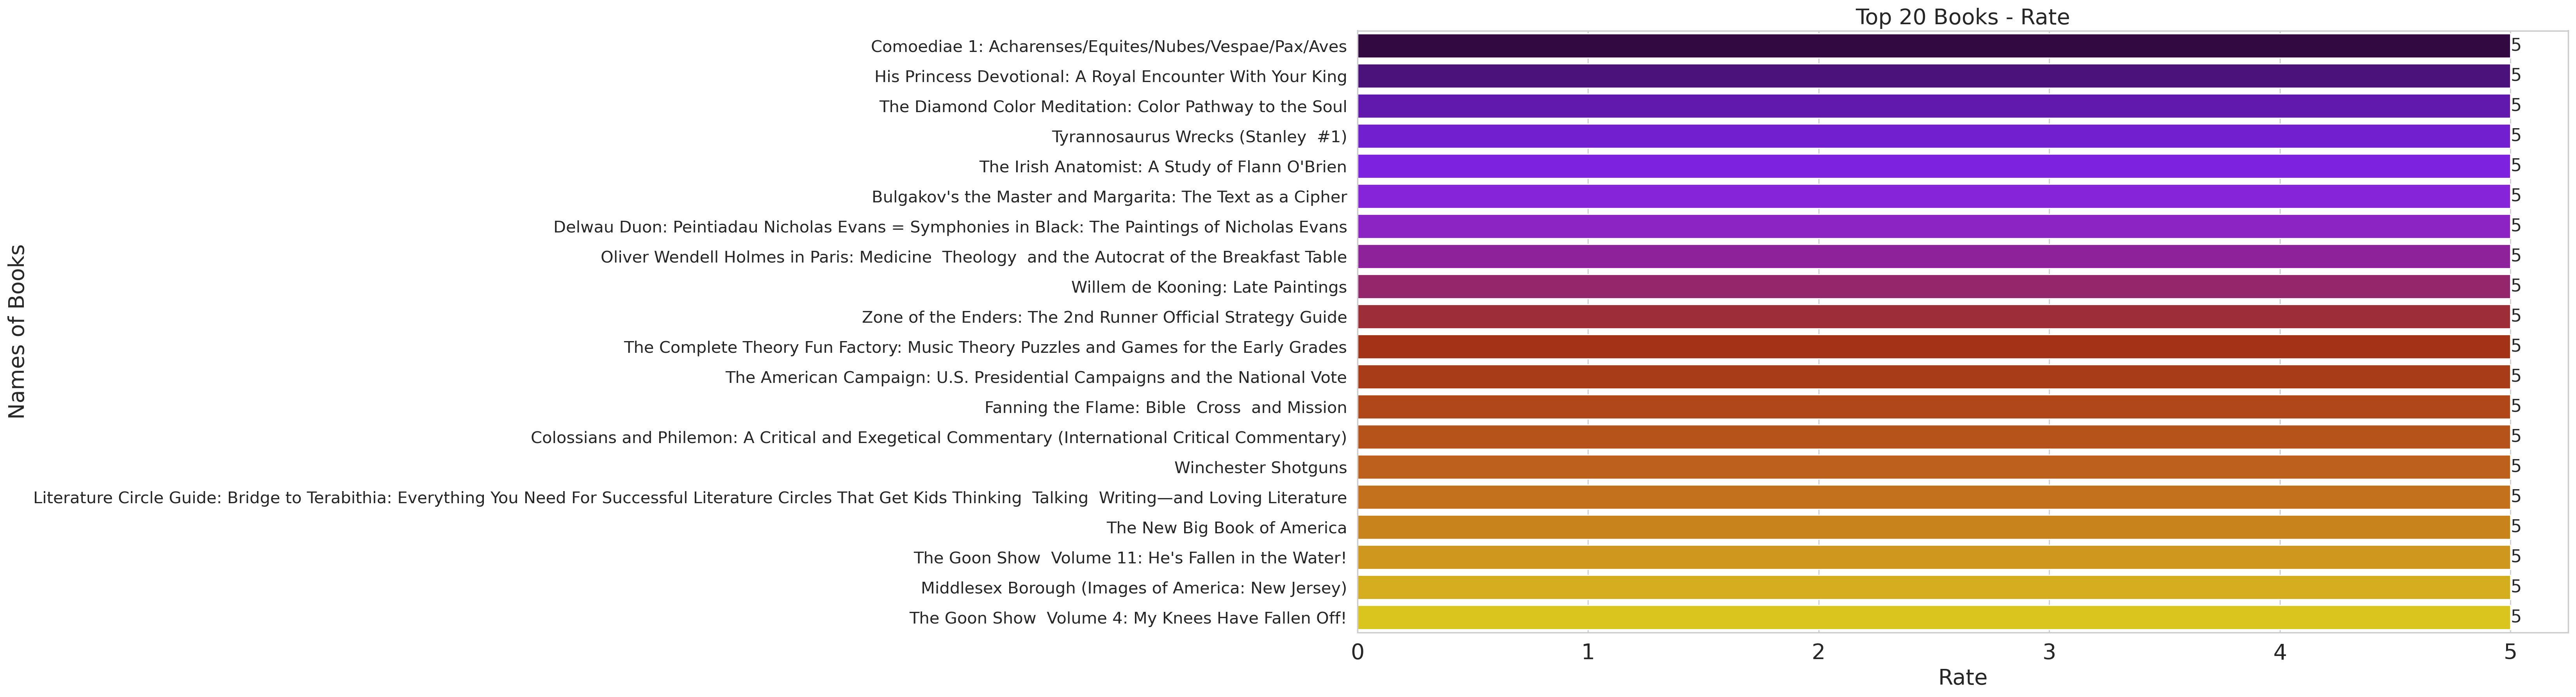

In [23]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books_rate = df1['title'][:20]
title_rate =  df1['average_rating'][:20]
ax = sns.barplot(x= title_rate, y=Top_20_books_rate , palette="gnuplot")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Rate", fontsize=20)
plt.title("Top 20 Books - Rate", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Top 20 publishers

</p>
</div>

Text(0.5, 1.0, 'Top 20 Publishers - Rate')

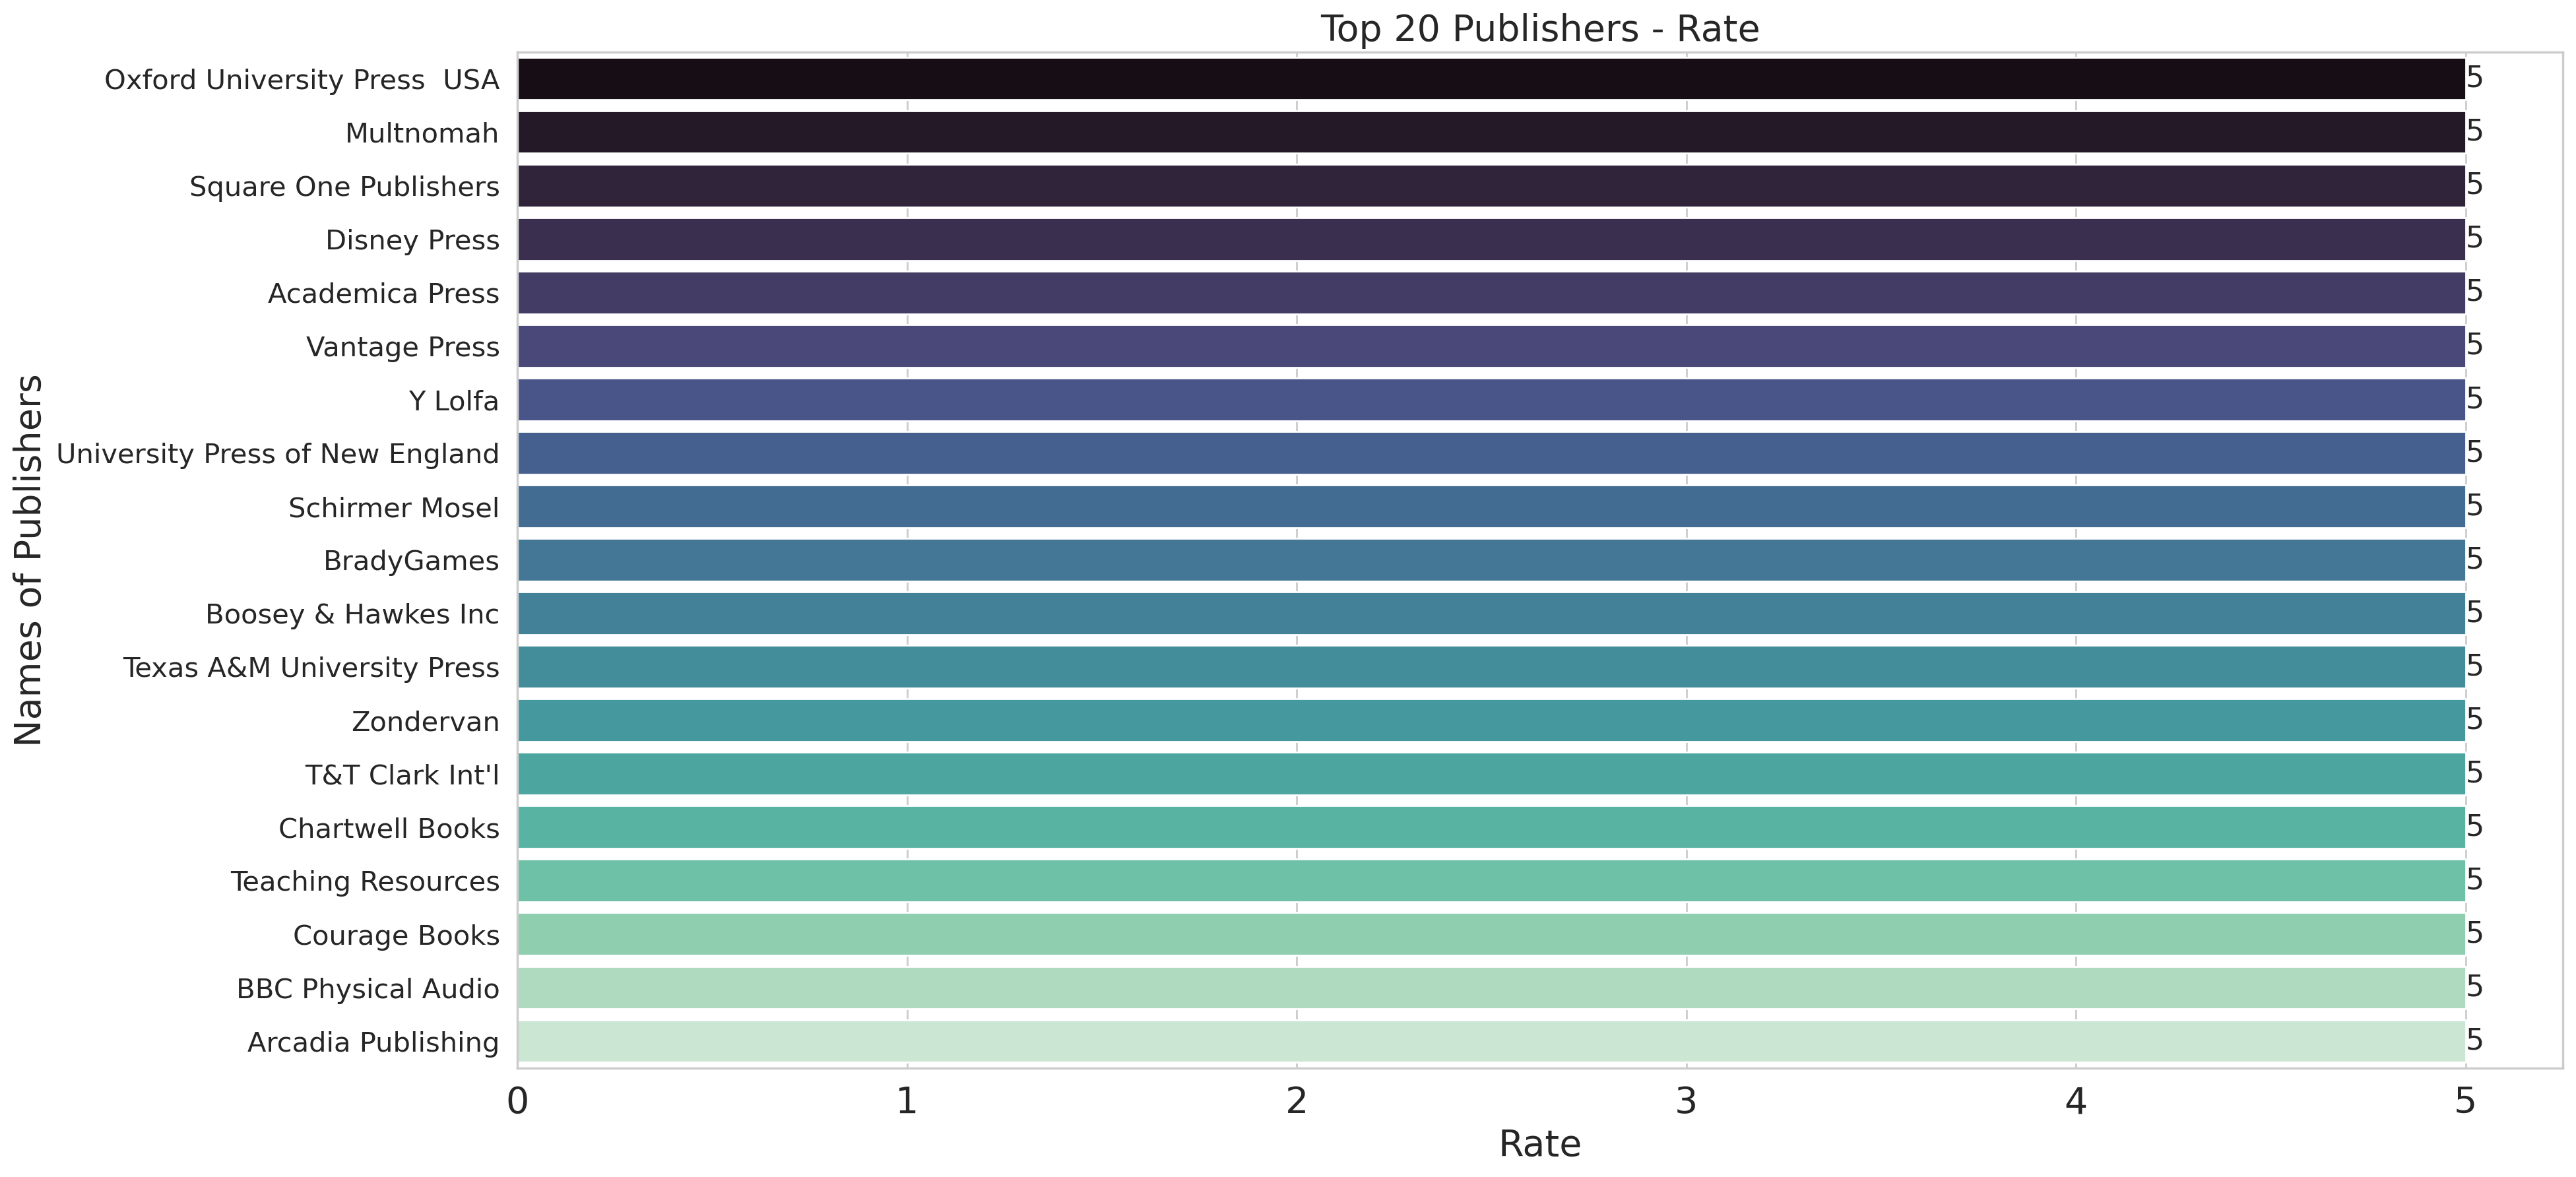

In [24]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publisher_rate = df1['publisher'][:20]
publisher_rate =  df1['average_rating'][:20]
ax = sns.barplot(x= publisher_rate, y=Top_20_publisher_rate , palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Publishers", fontsize=20)
plt.xlabel("Rate", fontsize=20)
plt.title("Top 20 Publishers - Rate", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Top 20 authors

</p>
</div>

Text(0.5, 1.0, 'Top 20 Authors - Rate')

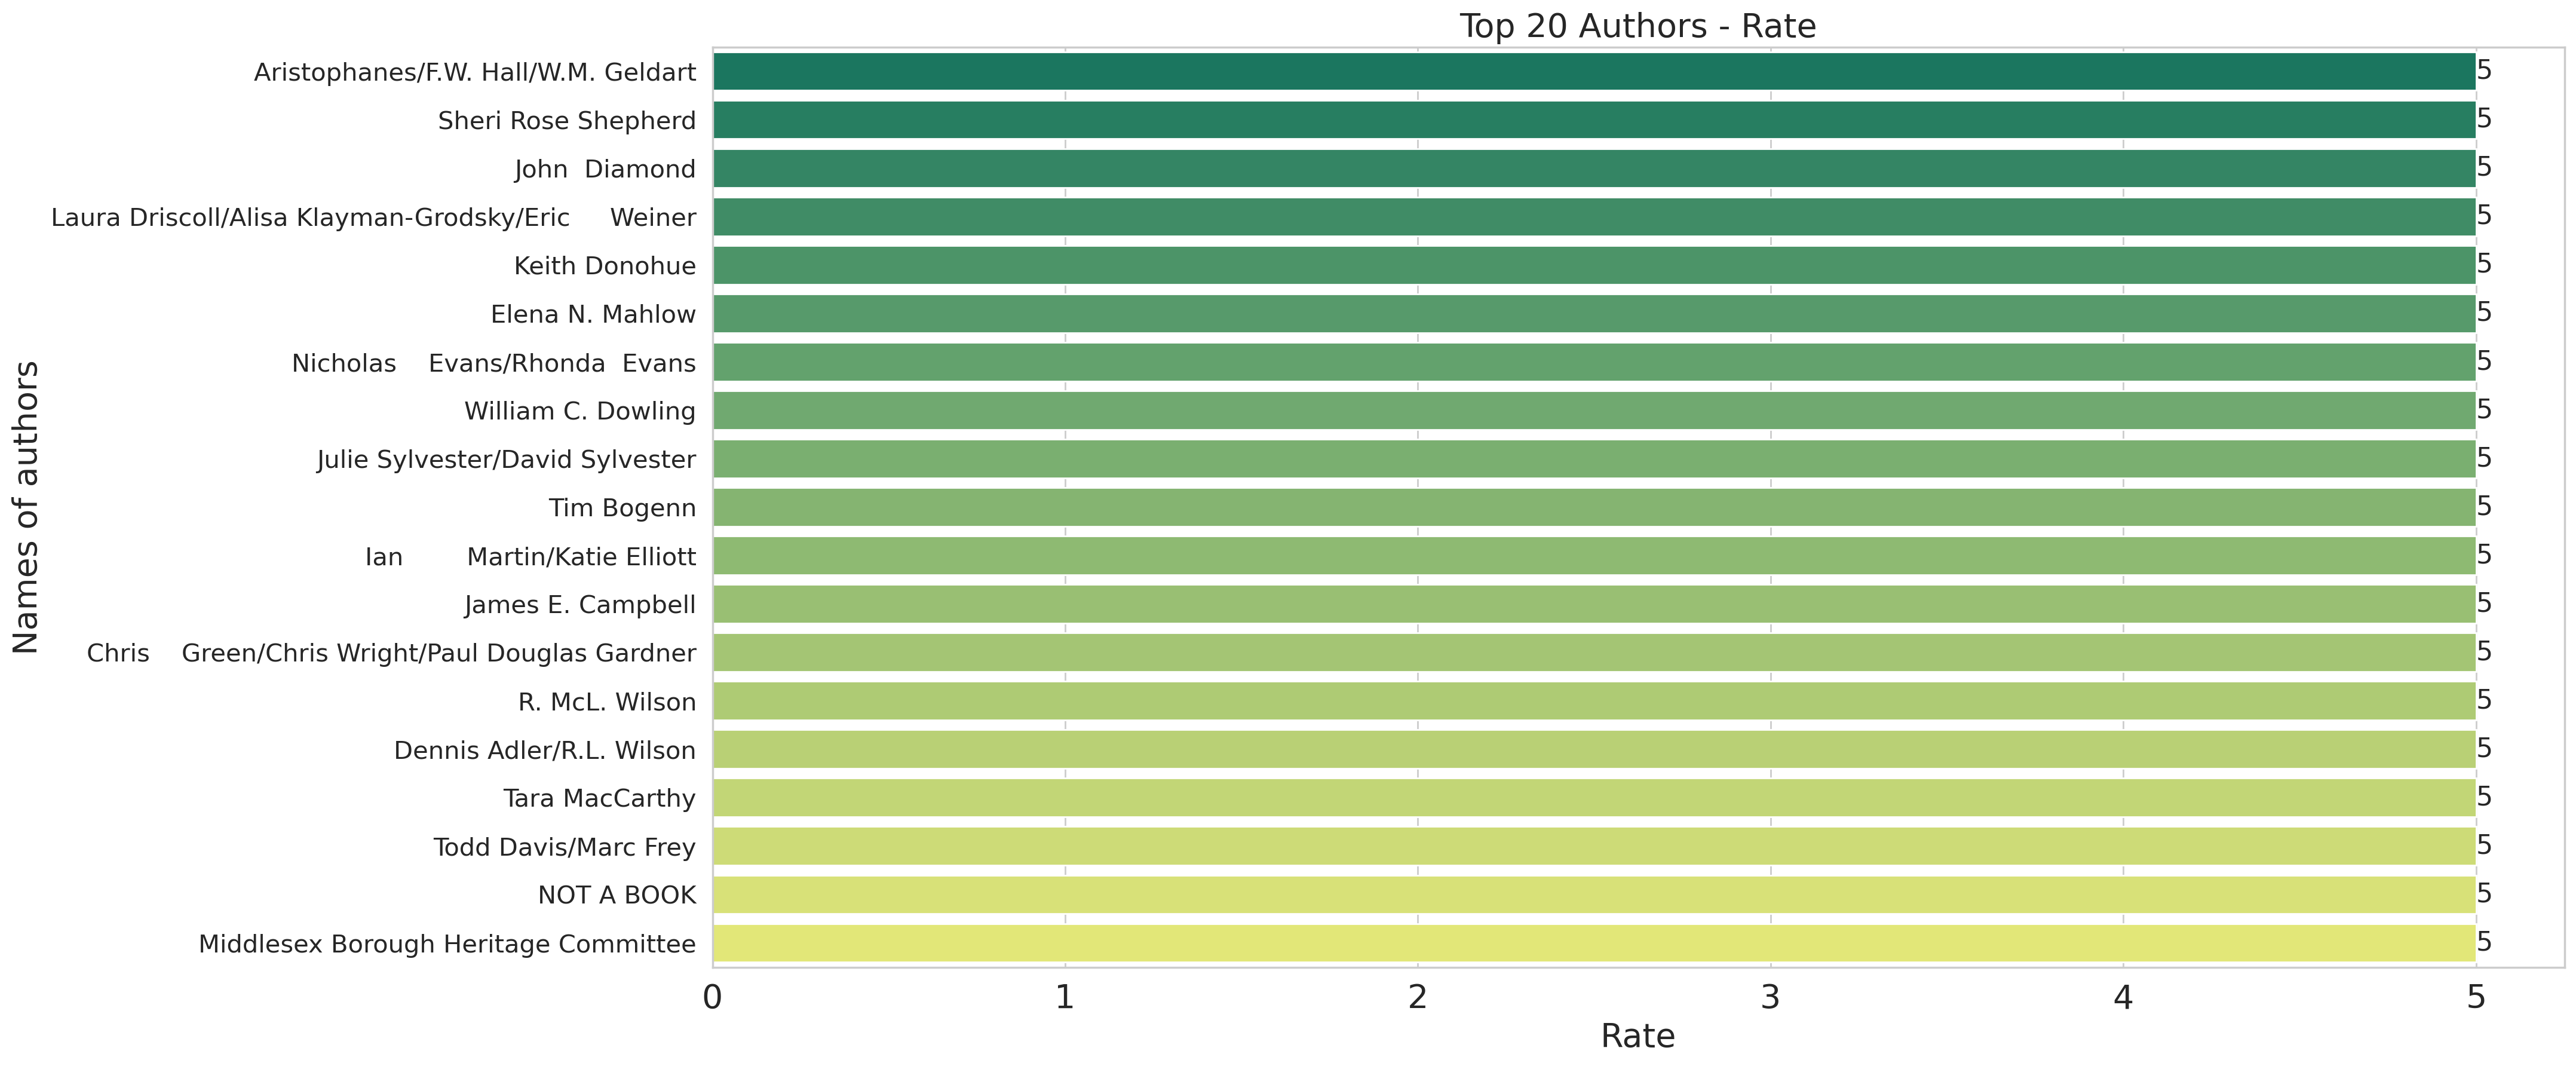

In [25]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_authors_rate = df1['authors'][:20]
authors_rate =  df1['average_rating'][:20]
ax = sns.barplot(x= authors_rate, y=Top_20_authors_rate , palette="summer")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of authors", fontsize=20)
plt.xlabel("Rate", fontsize=20)
plt.title("Top 20 Authors - Rate", fontsize= 20)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 And many more ...

</p>
</div>

# 5: Next: Let's create a (Search Engine).

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">One of the most important parts of building a recommender system is correcting and setting rules for correct and accurate searches. I plan to create a search engine by creating a series of functions so that we can find the searched books inside it, with any writing format.
That's why we need to make some changes to the existing data. So let's go..✔

</p>
</div>

In [26]:
engine = df

In [27]:
engine["rating"] = pd.to_numeric(engine['average_rating'],errors='coerce')

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 This part will make us create a new column in which the names of the books will be created without having wrong and extra letters. Like # () /

</p>
</div>

In [28]:
engine["Re_title"] = engine["title"].str.replace("[^a-zA-Z0-9]"," ",regex=True)

In [29]:
engine.to_json("books_engine.json")
engine

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating,Re_title
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.57,Harry Potter and the Half Blood Prince Harry ...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.49,Harry Potter and the Order of the Phoenix Har...
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4.42,Harry Potter and the Chamber of Secrets Harry...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.56,Harry Potter and the Prisoner of Azkaban Harr...
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.78,Harry Potter Boxed Set Books 1 5 Harry Potte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,4.06,Expelled from Eden A William T Vollmann Reader
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,4.08,You Bright and Risen Angels
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,3.96,The Ice Shirt Seven Dreams 1
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,3.72,Poor People


<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Pay attention to the "title" and "Re_title" columns and see the changes.

</p>
</div>


<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Now, with vectorize and cosine, it is tried to make the format of the texts numerical and can be analyzed and searched for by the machine.

</p>
</div>


In [30]:
Vectorize = TfidfVectorizer()

In [31]:
Tfvect = Vectorize.fit_transform(engine["Re_title"])

In [32]:
def search(Query, Vectorize):
    sub_match = re.sub("[^a-zA-Z0-9]"," ", Query.lower())
    Query_vec = Vectorize.transform([sub_match])
    Similarity = cosine_similarity(Query_vec, Tfvect).flatten()
    indexes = np.argpartition(Similarity, -10)[-10:]
    finall = engine.iloc[indexes]
    finall = finall.sort_values("average_rating", ascending = False)
    return finall.head(5)

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 The search engine was created based on the names of the books. We can do this based on any other variable or combine them. You can also write functions that directly find the link to the book and the image of the book. Of course, provided that you have used scraping.

</p>
</div>

<div style="color:black;
           display:fill;
           border-radius:120px;
           background-color:powderblue;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:black;">📌 Now it is enough for the user to type the name of the book. The engine will show the names of related books. Whether the letters are capital or not is not important at all.

</p>
</div>

In [33]:
search("HarrY",Vectorize)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating,Re_title
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.78,Harry Potter Boxed Set Books 1 5 Harry Potte...
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4.73,Harry Potter Collection Harry Potter 1 6
615,2005,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780747584667,eng,768,1213,78,6/23/2006,Bloomsbury Publishing,4.57,Harry Potter and the Half Blood Prince Harry ...
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.57,Harry Potter and the Half Blood Prince Harry ...
10675,43509,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,4.56,074754624X,9780747546245,eng,636,18754,906,7/8/2000,Bloomsbury,4.56,Harry Potter and the Goblet of Fire Harry Pot...


In [34]:
search("BilL GatEs",Vectorize)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating,Re_title
10262,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.00,0739844326,9780739844328,eng,48,0,0,11/1/2001,Raintree,5.00,Bill Gates Computer Legend Famous Lives
2248,8048,Bill Buzz,Roger Hargreaves/Gray Jolliffe,4.67,0679801154,9780679801153,eng,32,2,0,10/14/1989,Random House for Young Readers,4.67,Bill Buzz
377,1305,Gates of Fire,Steven Pressfield,4.42,055338368X,9780553383683,eng,392,21934,1629,9/27/2005,Bantam,4.42,Gates of Fire
10261,41611,Hard Drive: Bill Gates and the Making of the M...,James Wallace/Jim Erickson,4.11,0887306292,9780887306297,en-US,426,1234,41,3/26/1993,HarperCollins,4.11,Hard Drive Bill Gates and the Making of the M...
10522,42883,Bill Bryson: The Complete Notes,Bill Bryson,4.09,038560131X,9780385601313,eng,544,901,36,10/5/2000,Doubleday,4.09,Bill Bryson The Complete Notes



<p style="text-align:center;"><span style="font-size:48px;"><span style="color:crimson;"><span style="font-family:cursive;"> End of Part 1! :) </span> </span>  </span></p>

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">I hope you have enjoyed the process of building the book recommender system so far. In the next parts, with machine learning, we can create a recommender system and further enter the field of artificial intelligence. I would be appereciated if you let me know  your opinion by your comments and giving this kernel a vote. ❤

</p>
</div>
